# Logistic regression

The main goal in the process of algorithm training is to minimize the loss function. Let's suppose that we have created an algorithm which classifies objects into two classes. In order to understand how good is our algorithm, we need to define the <i>quality function</i>. Usually it is the upper bound of the following quality function:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} L (y_i, \langle w, x_i \rangle) \to \min_w
$$

where $L$ is loss function. One of the upper bounds of $L$ can be logistic function $f(x) = \dfrac{1}{1+e^{-x}}$. We are going to use logistic function as loss function:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) \to \min_w
$$

Also we need to use regularization in order not to overfit. We are going to use both $L_1$ (Lasso) and $L_2$ (Ridge) regularizers. So, our goal is to minimize this quality function:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \lambda_1 \lVert w \rVert_1 + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

We are going to find $w$ using gradient descent (full and stochastic):

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

The gradient is calculated by the formula:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_1 sgn (w) +\lambda_2 w
$$

As a stopping criterion we are going to use number of iterations (max_iter) and euclidean norm of difference of weights on two consecutive iterations (tolerance). The probability of belonging object $x$ to class $+1$ is calculated by the formula:

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- \langle w, x \rangle )}
$$

## Algorithm examination

### Full gradient descent VS Stochastic gradient descent

Let's generate some data and test our algorithm. First of all, let's compare full gradient descent and stochastic gradient descent looking on the value of loss function and running time.

Populating the interactive namespace from numpy and matplotlib


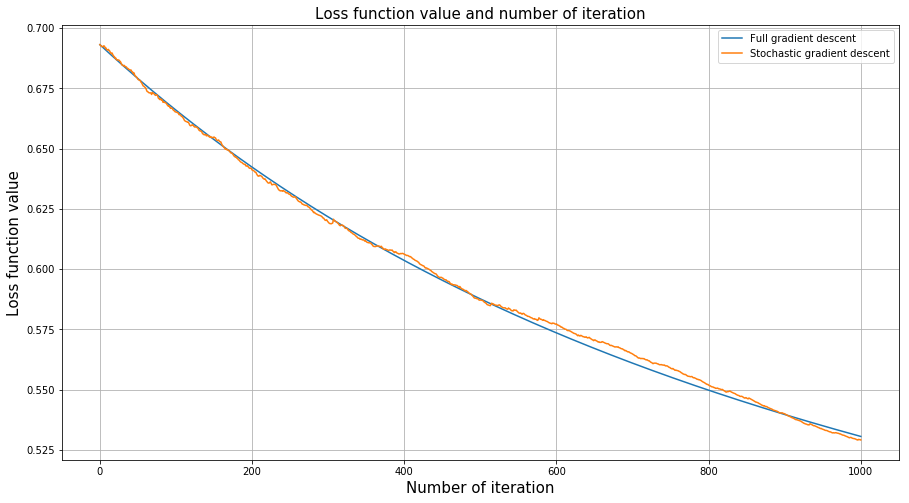

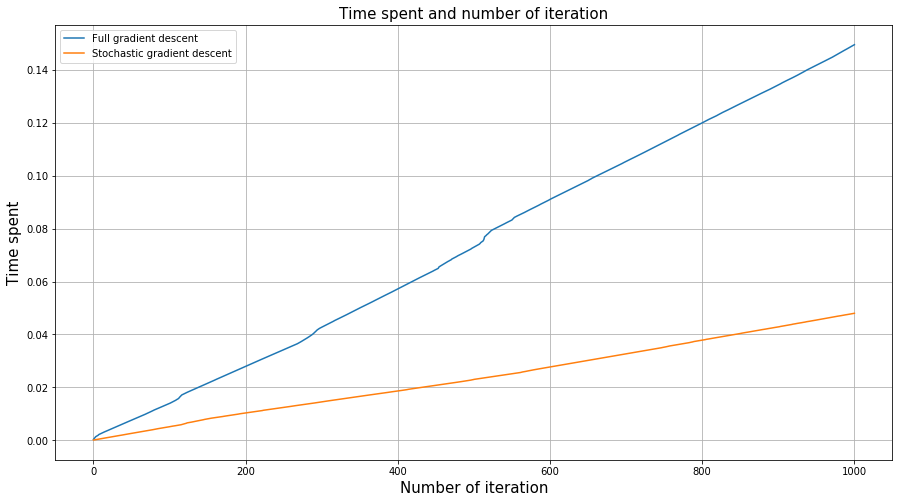

In [15]:
%pylab inline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import MyLogReg

X, y = make_classification(n_samples=1000)
y[y == 0] = -1
scaler = StandardScaler()
X = scaler.fit_transform(X)

full_grad = MyLogReg.LogReg(gd_type='full')
stochastic_grad = MyLogReg.LogReg(gd_type='stochastic')

full_grad.fit(X, y)
stochastic_grad.fit(X, y)

plt.figure(figsize=(15, 8))
plt.title('Loss function value and number of iteration', size=15)
plt.plot(np.arange(len(full_grad.loss_history)), full_grad.loss_history, label='Full gradient descent')
plt.plot(np.arange(len(stochastic_grad.loss_history)), stochastic_grad.loss_history, label='Stochastic gradient descent')
plt.legend()
plt.grid()
plt.xlabel('Number of iteration', size=15)
plt.ylabel('Loss function value', size=15)
plt.show()

plt.figure(figsize=(15, 8))
plt.title('Time spent and number of iteration', size=15)
plt.plot(np.arange(len(full_grad.time_history)), full_grad.time_history, label='Full gradient descent')
plt.plot(np.arange(len(stochastic_grad.time_history)), stochastic_grad.time_history, label='Stochastic gradient descent')
plt.legend()
plt.grid()
plt.xlabel('Number of iteration', size=15)
plt.ylabel('Time spent', size=15)
plt.show()


According to the graphs that we obtained, we can see that the loss function value graph of full gradient descent is smoother than the loss function value graph of stochastic gradient descent. But the full gradient descent running time is noticeably longer than the stochastic gradient descent running time.

### Regularization VS No regularization

Let's see how does our algorithm work on the real database. We are going to use data from [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction). Let's compare the change of loss function value between algorithms with regularization and without. We set the following values for regularizers: $\lambda_1 = 0.001$, $\lambda_2 = 1$.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))

target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

X_train = np.hstack((X_train, np.ones(X_train.shape[0])[:,np.newaxis]))
X_test = np.hstack((X_test, np.ones(X_test.shape[0])[:,np.newaxis]))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

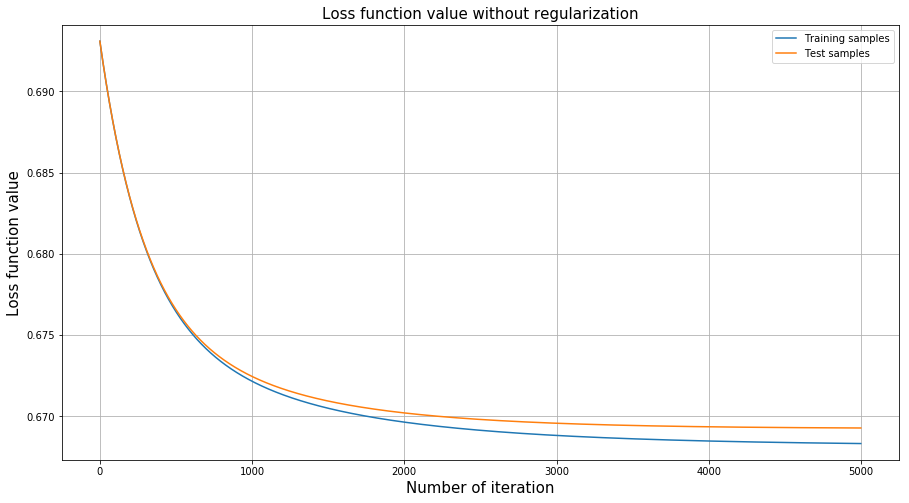

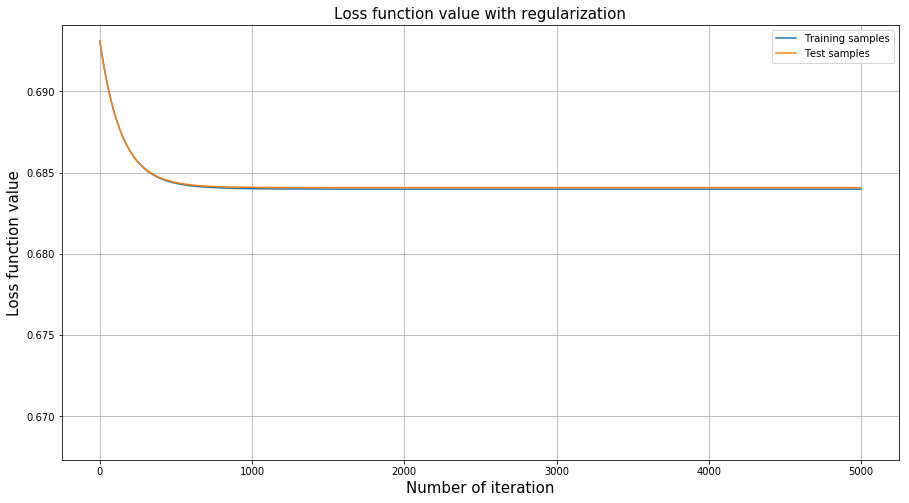

In [20]:
l2_w0 = None
nol2_w0 = None
l2_train_loss = []
l2_test_loss = []
nol2_train_loss = []
nol2_test_loss = []

for i in range(5000):
    l2_log_reg = MyLogReg.LogReg(lambda_1=0.001, lambda_2=1, max_iter=1, w0=l2_w0, gd_type='full', hist=False)
    nol2_log_reg = MyLogReg.LogReg(lambda_1=0, lambda_2=0, max_iter=1, w0=nol2_w0, gd_type='full', hist=False)
    
    l2_log_reg.fit(X_train, y_train)
    nol2_log_reg.fit(X_train, y_train)
    
    l2_train_loss.append(l2_log_reg.calc_loss(X_train, y_train))
    nol2_train_loss.append(nol2_log_reg.calc_loss(X_train, y_train))
    l2_test_loss.append(l2_log_reg.calc_loss(X_test, y_test))
    nol2_test_loss.append(nol2_log_reg.calc_loss(X_test, y_test))
    
    l2_w0 = l2_log_reg.w
    nol2_w0 = nol2_log_reg.w
    
plt.figure(figsize=(15, 8))
plt.title('Loss function value without regularization', size=15)
plt.plot(np.arange(len(nol2_train_loss)), nol2_train_loss, label='Training samples')
plt.plot(np.arange(len(nol2_test_loss)), nol2_test_loss, label='Test samples')
plt.legend()
plt.grid()
plt.ylim(min(min(nol2_train_loss), min(l2_train_loss))-0.001, max(max(nol2_train_loss), max(l2_train_loss))+0.001) 
plt.xlabel('Number of iteration', size=15)
plt.ylabel('Loss function value', size=15)
plt.show()


plt.figure(figsize=(15, 8))
plt.title('Loss function value with regularization', size=15)
plt.plot(np.arange(len(l2_train_loss)), l2_train_loss, label='Training samples')
plt.plot(np.arange(len(l2_test_loss)), l2_test_loss, label='Test samples')
plt.legend()
plt.grid()
plt.ylim(min(min(nol2_train_loss), min(l2_train_loss))-0.001, max(max(nol2_train_loss), max(l2_train_loss))+0.001) 
plt.xlabel('Number of iteration', size=15)
plt.ylabel('Loss function value', size=15)
plt.show()

We can see that at some point loss function without regularization for test samples stabilizes, but for trainig samples it continues to decline. This is a sign of overfitting.

### Algorithm's quality

Now let's compare my realization of logistic regression versus the realization in sklearn library. We are going to compare the area under ROC-curve (ROC-AUC) for both realizations. The higher value of ROC-AUC is, the better classifier does his job.

ROC-AUC of my LogReg:  0.620091749329
ROC-AUC of sklearn LogReg:  0.625053424201


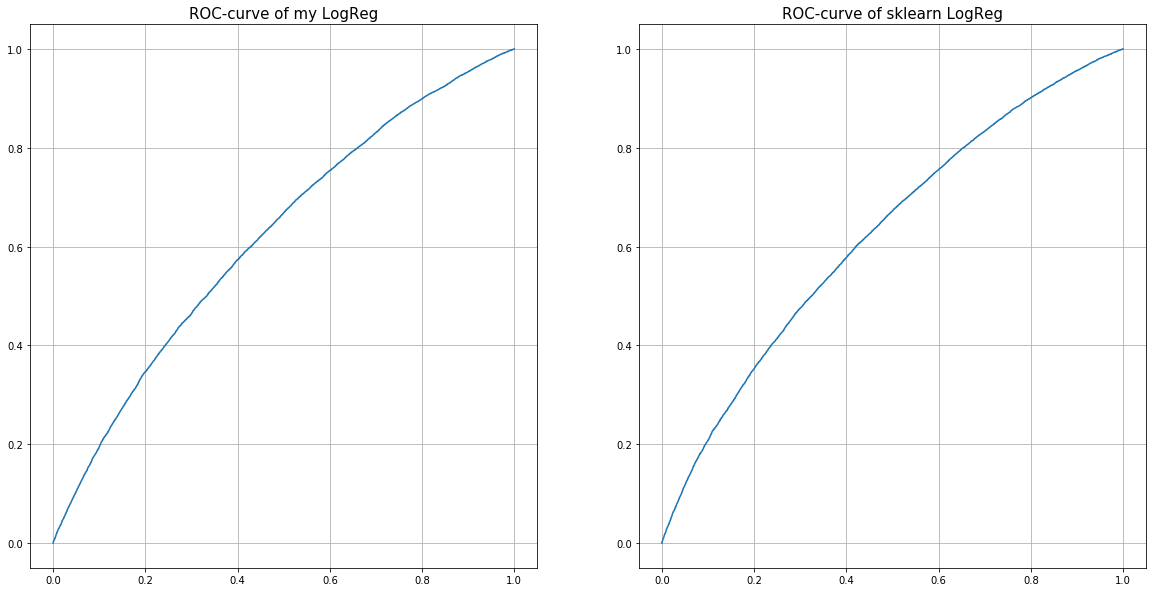

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

my_log_reg = MyLogReg.LogReg(hist=False, gd_type='full')
my_log_reg.fit(X_train, y_train)
my_y_pred_logreg = my_log_reg.predict_proba(X_test)

log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, my_y_pred_logreg[:,1])

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_logreg[:,1])

g, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10)) 
ax1.set_title('ROC-curve of my LogReg', size=15)
ax1.grid()
ax1.plot(fpr, tpr)
ax2.set_title('ROC-curve of sklearn LogReg', size=15)
ax2.grid()
ax2.plot(fpr2, tpr2)

print('ROC-AUC of my LogReg: ', roc_auc_score(y_test, my_y_pred_logreg[:,1]))
print('ROC-AUC of sklearn LogReg: ', roc_auc_score(y_test, y_pred_logreg[:,1]))



We can notice that my realization of logistic regression works slightly less qualitatively than the sklearn realization.